In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
import shap
import joblib
import xgboost as xgb


In [2]:
default_path = '../../jiyoon/asset/default/mhcld_puf_2022.csv'
processed1_path = '../../jiyoon/asset/prepro3/Îã®ÏàúÍ≤∞Ï∏°Ïπò ÌñâÎßå Ï∂îÏ∂ú.csv'
processed2_path = '../../jiyoon/asset/prepro3/Îã®ÏàúÍ≤∞Ï∏°Ïπò Ìñâ Ï†úÍ±∞.csv'
processed3_path = '../../jiyoon/asset/prepro3/Îã®ÏàúÍ≤∞Ï∏°Ïπò Ìñâ Ï†úÍ±∞ ÌõÑ ÏßÄÏó≠Î≥Ñ Ï∞®Ïù¥ ÏûàÎäî ÏπºÎüº Ï†úÍ±∞.csv'
processed4_path = '../../jiyoon/asset/prepro3/Í≤∞Ï∏°ÏπòÍ∞Ä Ìè¨Ìï®Îêú Î™®Îì† Ìñâ Ï†úÍ±∞.csv'
processed5_path = '../../jiyoon/asset/prepro3/ÏõêÌï´Ïù∏ÏΩîÎî©_Í≤∞Ï∏°ÏπòÍ∞Ä Ìè¨Ìï®Îêú Î™®Îì† Ìñâ Ï†úÍ±∞.csv'
processed6_path = '../../jiyoon/asset/prepro3/ÏõêÌï´Ïù∏ÏΩîÎî©_Îã®ÏàúÍ≤∞Ï∏°Ïπò Ìñâ Ï†úÍ±∞ ÌõÑ ÏßÄÏó≠Î≥Ñ Ï∞®Ïù¥ ÏûàÎäî ÏπºÎüº Ï†úÍ±∞.csv'

In [ ]:
dataset3 = pd.read_csv(processed3_path)

## 6.ÏπòÎ£åÍ∏∞Í¥Ä Î∂ÑÏÑù

### 1. Í∏∞Í¥ÄÎ≥Ñ Ïù¥Ïö© ÌòÑÌô© Î∂ÑÏÑù




In [23]:
# Í∏∞Í¥ÄÎ≥Ñ Ïù¥Ïö©Ïûê Ïàò Î∞è ÎπÑÏú® Í≥ÑÏÇ∞

# Í∏∞Í¥Ä Î≥ÄÏàò Î™©Î°ù
service_cols = ['SPHSERVICE', 'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE']

# Í∞Å Í∏∞Í¥ÄÎ≥Ñ Ïù¥Ïö©Ïûê Ïàò Î∞è ÎπÑÏú® Í≥ÑÏÇ∞
for col in service_cols:
    print(f"\n {col} Ïù¥Ïö©Ïûê ÌòÑÌô©")
    print(dataset3[col].value_counts(dropna=False))
    print(dataset3[col].value_counts(normalize=True, dropna=False).map(lambda x: f"{x:.2%}"))



 SPHSERVICE Ïù¥Ïö©Ïûê ÌòÑÌô©
SPHSERVICE
0    5231293
1      86317
Name: count, dtype: int64
SPHSERVICE
0    98.38%
1     1.62%
Name: proportion, dtype: object

 CMPSERVICE Ïù¥Ïö©Ïûê ÌòÑÌô©
CMPSERVICE
1    5160631
0     156979
Name: count, dtype: int64
CMPSERVICE
1    97.05%
0     2.95%
Name: proportion, dtype: object

 OPISERVICE Ïù¥Ïö©Ïûê ÌòÑÌô©
OPISERVICE
0    5073946
1     243664
Name: count, dtype: int64
OPISERVICE
0    95.42%
1     4.58%
Name: proportion, dtype: object

 RTCSERVICE Ïù¥Ïö©Ïûê ÌòÑÌô©
RTCSERVICE
0    5259532
1      58078
Name: count, dtype: int64
RTCSERVICE
0    98.91%
1     1.09%
Name: proportion, dtype: object

 IJSSERVICE Ïù¥Ïö©Ïûê ÌòÑÌô©
IJSSERVICE
0    5271913
1      45697
Name: count, dtype: int64
IJSSERVICE
0    99.14%
1     0.86%
Name: proportion, dtype: object


In [24]:
# Í∞úÏù∏Î≥Ñ Í∏∞Í¥Ä Ïù¥Ïö© Í∞úÏàò Î≥ÄÏàò ÏÉùÏÑ±

# Ïù¥Ïö©Ìïú Í∏∞Í¥Ä Ïàò (1Í∞íÎßå Ïπ¥Ïö¥Ìä∏)
dataset3['NUM_SERVICES_USED'] = (dataset3[service_cols] == 1).sum(axis=1)

# Î∂ÑÌè¨ ÌôïÏù∏
print(dataset3['NUM_SERVICES_USED'].value_counts().sort_index())



NUM_SERVICES_USED
1    5062839
2     233880
3      19803
4       1061
5         27
Name: count, dtype: int64


In [25]:
# Í∏∞Í¥ÄÏù¥Ïö© Ï°∞Ìï© ÌÉêÏÉâ

# Í∏∞Í¥Ä Ïù¥Ïö© Ï°∞Ìï© (ex: '01001' ‚Üí Í∞Å Í∏∞Í¥Ä Ïù¥Ïö©Ïó¨Î∂ÄÎ•º Î¨∏ÏûêÏó¥Î°ú Î¨∂Í∏∞)
# Í∞Å ÏÑúÎπÑÏä§ Ïù¥Ïö© Ïó¨Î∂ÄÎ•º ÎπÑÌä∏ ÏûêÎ¶¨Î°ú Í∞ÑÏ£ºÌïòÏó¨ Ïù¥ÏßÑÏàòÎ°ú Ïù∏ÏΩîÎî© (01001 ‚Üí 9)
dataset3['SERVICE_PATTERN_NUM'] = dataset3[service_cols].dot(1 << np.arange(len(service_cols)-1, -1, -1))

# Ïù¥ÏßÑ Ìå®ÌÑ¥ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò (ÏÑ†ÌÉùÏÇ¨Ìï≠)
dataset3['SERVICE_PATTERN'] = dataset3['SERVICE_PATTERN_NUM'].apply(lambda x: format(x, f'0{len(service_cols)}b'))


# Ï°∞Ìï©Î≥Ñ ÎπàÎèÑ
print(dataset3['SERVICE_PATTERN'].value_counts().head(10))


SERVICE_PATTERN
01000    4910437
01100     138470
00100      83485
11000      43024
10000      30625
01001      24096
01010      23926
00010      21053
00001      17239
01110       8733
Name: count, dtype: int64


Step 1. ÏπòÎ£åÍ∏∞Í¥Ä Ïù¥Ïö© ÌòÑÌô© Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ

1-1. Í∞Å Í∏∞Í¥ÄÎ≥Ñ Ïù¥Ïö©Î•†

- **CMPSERVICE** (ÏßÄÏó≠ÏÇ¨Ìöå Í∏∞Î∞ò Ï†ïÏã†Í±¥Í∞ï ÏÑúÎπÑÏä§) Ïù¥Ïö©ÏûêÍ∞Ä Ï†ÑÏ≤¥Ïùò **97.05%**Î°ú Í∞ÄÏû• ÎßéÏïòÏúºÎ©∞, Ïù¥Îäî ÎåÄÎ∂ÄÎ∂ÑÏùò ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Í∞Ä **ÎπÑÏûÖÏõêÌòï, Ïô∏Îûò Ï§ëÏã¨ ÏπòÎ£å**Î•º Î∞õÏùÄ Í≤ÉÏùÑ ÏùòÎØ∏ÌïúÎã§.
- **OPISERVICE** (Í∏∞ÌÉÄ Ï†ïÏã†Í≥º ÏûÖÏõê ÏãúÏÑ§) Ïù¥Ïö©ÏûêÎäî **4.58%**, ÎπÑÍµêÏ†Å ÎÇÆÏßÄÎßå ÏûÖÏõê ÏπòÎ£å Í≤ΩÌñ•ÏùÑ Î∞òÏòÅÌïúÎã§.
- **SPHSERVICE** (Ï£ºÎ¶Ω Ï†ïÏã†Î≥ëÏõê): **1.62%**ÎßåÏù¥ Ïù¥Ïö©, Îß§Ïö∞ Ï†úÌïúÏ†Å.
- **RTCSERVICE** (Í±∞Ï£º ÏπòÎ£å ÏÑºÌÑ∞): **1.09%**Î°ú ÏùºÎ∂Ä Ïû•Í∏∞ Ï£ºÍ±∞ ÏπòÎ£å Ï§ëÏã¨.
- **IJSSERVICE** (ÍµêÏ†ïÏãúÏÑ§ ÎÇ¥ ÏπòÎ£å): **0.86%**, ÎπÑÏú®ÏùÄ Ï†ÅÏúºÎÇò ÏÇ¨ÌöåÏ†ÅÏúºÎ°ú ÌäπÏàòÌïú ÌôòÍ≤ΩÏûÑ.

‚û°Ô∏è Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú **ÎåÄÎ∂ÄÎ∂ÑÏùò ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Îäî Ïô∏Îûò Ï§ëÏã¨Ïùò ÏßÄÏó≠ÏÇ¨Ìöå Í∏∞Î∞ò Í∏∞Í¥Ä(CMPSERVICE)Îßå Ïù¥Ïö©**ÌïòÍ≥† ÏûàÏúºÎ©∞, ÏûÖÏõê ÏπòÎ£åÎÇò ÌäπÏàò ÏãúÏÑ§ Ïù¥Ïö©ÏùÄ Ï†úÌïúÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇ®.

---

1-2. ÏπòÎ£åÍ∏∞Í¥Ä ÎèôÏãú Ïù¥Ïö© Í∞úÏàò

- Ìïú ÏÇ¨ÎûåÏù¥ Ïù¥Ïö©Ìïú Í∏∞Í¥Ä ÏàòÎ•º Ìï©ÏÇ∞Ìïú Í≤∞Í≥º:
  - **1Í∞ú Í∏∞Í¥ÄÎßå Ïù¥Ïö©**Ìïú ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Í∞Ä **ÏïΩ 95.0% (5,062,839Î™Ö)** Î°ú Í∞ÄÏû• ÎßéÏùå
  - **2Í∞ú Í∏∞Í¥Ä ÎèôÏãú Ïù¥Ïö©**: 233,880Î™Ö (ÏïΩ 4.4%)
  - **3Í∞ú Ïù¥ÏÉÅ** ÎèôÏãú Ïù¥Ïö©ÏûêÎèÑ ÏÜåÏàò Ï°¥Ïû¨ (ÏµúÎåÄ 5Í∞ú Ïù¥Ïö©ÏûêÎèÑ 27Î™Ö ÏûàÏùå)

‚û°Ô∏è ÎåÄÎ∂ÄÎ∂ÑÏùÄ Îã®Ïùº Í∏∞Í¥Ä Ïù¥Ïö©ÏûêÏßÄÎßå, **Ï§ëÎ≥µ ÏÑúÎπÑÏä§ ÏàòÌòúÏûêÎèÑ Ïú†ÏùòÎØ∏ÌïòÍ≤å Ï°¥Ïû¨**ÌïòÏó¨, Ïù¥Îì§Ïóê ÎåÄÌïú ÌõÑÏÜç Î∂ÑÏÑùÏù¥ Í∞ÄÎä•Ìï®.

---

1-3. Í∏∞Í¥Ä Ïù¥Ïö© Ìå®ÌÑ¥ (Ï°∞Ìï©)

ÏÉÅÏúÑ 10Í∞úÏùò Í∏∞Í¥Ä Ïù¥Ïö© Ï°∞Ìï©ÏùÑ Î≥¥Î©¥:

| Ìå®ÌÑ¥ | ÏùòÎØ∏ | Ïù∏Ïõê |
|-------|------|------|
| `01000` | CMPSERVICEÎßå Ïù¥Ïö© | **4,910,437Î™Ö** |
| `01100` | CMPSERVICE + OPISERVICE | 138,470Î™Ö |
| `00100` | OPISERVICEÎßå Ïù¥Ïö© | 83,485Î™Ö |
| `11000` | SPHSERVICE + CMPSERVICE | 43,024Î™Ö |
| `10000` | SPHSERVICEÎßå Ïù¥Ïö© | 30,625Î™Ö |
| `01001` | CMPSERVICE + IJSSERVICE | 24,096Î™Ö |
| `01010` | CMPSERVICE + RTCSERVICE | 23,926Î™Ö |
| `00010` | RTCSERVICEÎßå Ïù¥Ïö© | 21,053Î™Ö |
| `00001` | IJSSERVICEÎßå Ïù¥Ïö© | 17,239Î™Ö |
| `01110` | CMPSERVICE + OPISERVICE + RTCSERVICE | 8,733Î™Ö |

‚û°Ô∏è Í∞ÄÏû• ÌùîÌïú Ìå®ÌÑ¥ÏùÄ **CMPSERVICE Îã®ÎèÖ Ïù¥Ïö©(01000)**Ïù¥Î©∞,  
Í∑∏ Ïô∏ÏóêÎäî CMPSERVICEÎ•º Í∏∞Î∞òÏúºÎ°ú ÏûÖÏõêÌòï ÎòêÎäî ÌäπÏàòÍ∏∞Í¥ÄÏù¥ Ï°∞Ìï©ÎêòÎäî Í≤ΩÏö∞Í∞Ä ÎßéÏùå.

---

ÏãúÏÇ¨Ï†ê

- ÎåÄÎ∂ÄÎ∂ÑÏùò ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Îäî **ÎπÑÏûÖÏõêÌòï Ïô∏Îûò ÏπòÎ£å Ï§ëÏã¨Ïùò ÏÑúÎπÑÏä§Îßå Ïù¥Ïö©**ÌïòÏßÄÎßå, ÏùºÎ∂Ä ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Îäî Îã§Ï§ëÍ∏∞Í¥ÄÏùÑ ÎèôÏãúÏóê Ïù¥Ïö©.
- ÌäπÌûà CMPSERVICEÏôÄ OPISERVICE, RTCSERVICE Îì±Ïùò Ï°∞Ìï©ÏùÄ **Ïã¨Ìôî ÏπòÎ£å, Î≥µÌï© ÏÉÅÌÉú**, ÎòêÎäî **ÌäπÏàòÌïú ÏÉÅÌô©(ÍµêÏ†ïÏãúÏÑ§ Îì±)**ÏùÑ Î∞òÏòÅÌï† Ïàò ÏûàÏñ¥ **ÏÑ∏Î∂Ä ÌäπÏÑ± Î∂ÑÏÑùÏù¥ ÌïÑÏöî**Ìï®.
- Ï∂îÌõÑ Î∂ÑÏÑùÏóêÏÑúÎäî Ïù¥ `NUM_SERVICES_USED` Î≥ÄÏàòÏôÄ Í∏∞Í¥Ä Ï°∞Ìï© Ìå®ÌÑ¥ÏùÑ ÌôúÏö©Ìï¥:
  - **ÏûÖÏõê Ïó¨Î∂Ä ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±**
  - **Îã§Ï§ë Ïù¥Ïö©ÏûêÏôÄ Îã®Ïùº Ïù¥Ïö©Ïûê ÎπÑÍµê**
  - **Í∏∞Í¥Ä ÏàòÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏù∏ Î∂ÑÏÑù** Îì±ÏùÑ ÏàòÌñâÌï† Ïàò ÏûàÏùå.


### 2. ÏûÖÏõê Í≤ΩÌóò ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ± Î∞è ÎπÑÍµêÎ∂ÑÏÑù

SPHSERVICE, OPISERVICE, RTCSERVICE Ï§ë ÌïòÎÇòÎùºÎèÑ Ïù¥Ïö©Ìïú Í≤ΩÏö∞ ‚Üí ÏûÖÏõê ÏπòÎ£å Í≤ΩÌóòÏù¥ ÏûàÎäî Í≤ÉÏúºÎ°ú Í∞ÑÏ£º

ÌååÏÉù Î≥ÄÏàò INPATIENTÎ•º ÎßåÎì§Ïñ¥ÏÑú:

Ïù∏Íµ¨ÌÜµÍ≥ÑÏ†Å ÌäπÏÑ±(AGE, GENDER Îì±)

ÏßÑÎã® Ïàò(NUMMHS), Î¨ºÏßàÏÇ¨Ïö©Î¨∏Ï†ú(SAP), Í≥†Ïö©ÏÉÅÌÉú(EMPLOY), Ï£ºÍ±∞ÏÉÅÌÉú(LIVARAG) Îì±Í≥ºÏùò Ï∞®Ïù¥Ï†ê Î∂ÑÏÑù

In [26]:
# IMPATIENT Î≥ÄÏàò ÏÉùÏÑ±
# ÏûÖÏõêÏπòÎ£å Í¥ÄÎ†® ÏÑúÎπÑÏä§ Ï§ë ÌïòÎÇòÎùºÎèÑ Ïù¥Ïö©Ìïú Í≤ΩÏö∞ 1, ÏïÑÎãàÎ©¥ 0
dataset3['INPATIENT'] = (
    (dataset3['SPHSERVICE'] == 1) |
    (dataset3['OPISERVICE'] == 1) |
    (dataset3['RTCSERVICE'] == 1)
).astype(int)

# Î∂ÑÌè¨ ÌôïÏù∏
print(dataset3['INPATIENT'].value_counts())
print(dataset3['INPATIENT'].value_counts(normalize=True).map(lambda x: f"{x:.2%}"))



INPATIENT
0    4951772
1     365838
Name: count, dtype: int64
INPATIENT
0    93.12%
1     6.88%
Name: proportion, dtype: object


In [27]:
# ÏûÖÏõê Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÌäπÏÑ± ÎπÑÍµê

# Í∑∏Î£πÎ≥Ñ ÌèâÍ∑† ÎπÑÍµê
print(dataset3.groupby('INPATIENT')[['AGE', 'NUMMHS']].mean())

# Î≤îÏ£ºÌòï Î≥ÄÏàò ÎπÑÏú® ÎπÑÍµê: SAP, GENDER
for col in ['GENDER', 'SAP']:
    print(f"\n {col} Î∂ÑÌè¨ (ÏûÖÏõê Í≤ΩÌóò Í∏∞Ï§Ä)")
    display(pd.crosstab(dataset3[col], dataset3['INPATIENT'], normalize='columns') * 100)


                AGE    NUMMHS
INPATIENT                    
0          0.462099  1.311168
1          0.529284  1.318472

 GENDER Î∂ÑÌè¨ (ÏûÖÏõê Í≤ΩÌóò Í∏∞Ï§Ä)


INPATIENT          0          1
GENDER                         
0          53.994106  43.587872
1          46.005894  56.412128


 SAP Î∂ÑÌè¨ (ÏûÖÏõê Í≤ΩÌóò Í∏∞Ï§Ä)


INPATIENT          0          1
SAP                            
-99         8.345114   8.384312
 1         35.604446  61.324958
 2         56.050440  30.290730

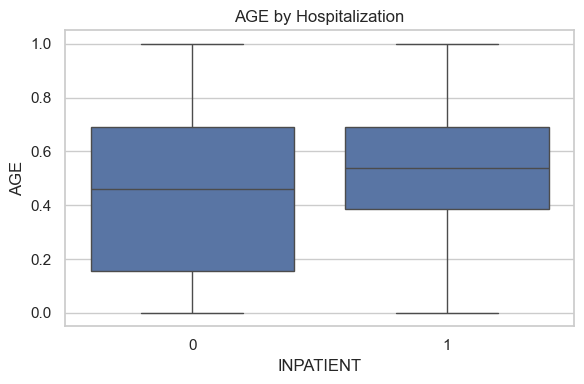

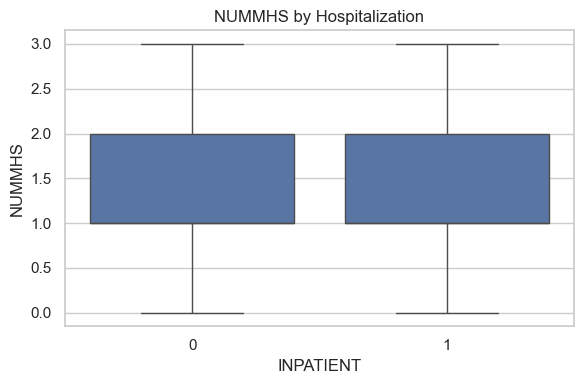

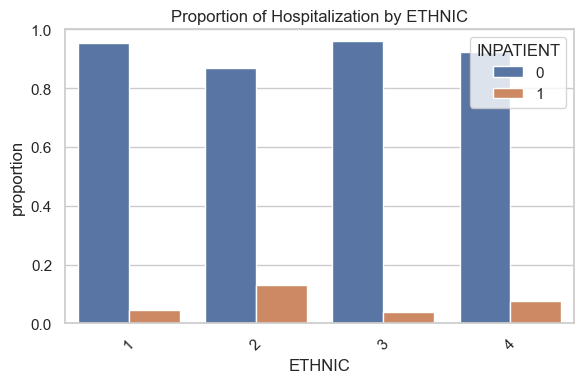

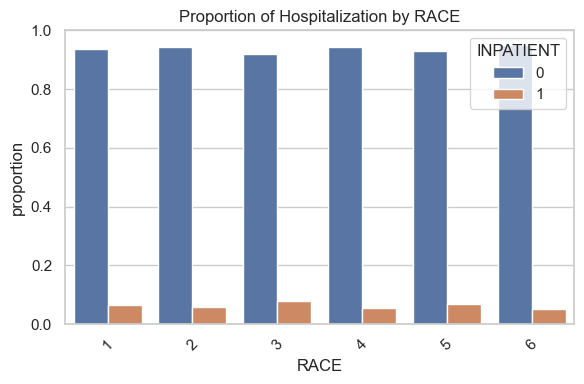

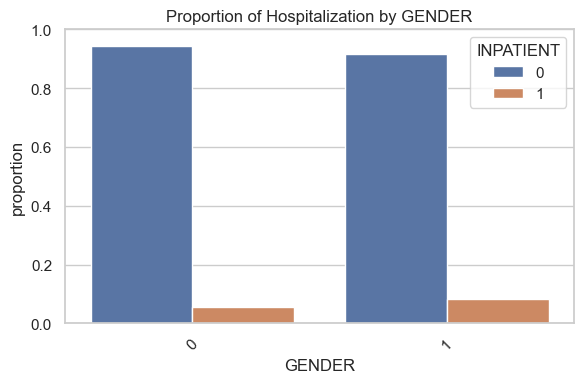

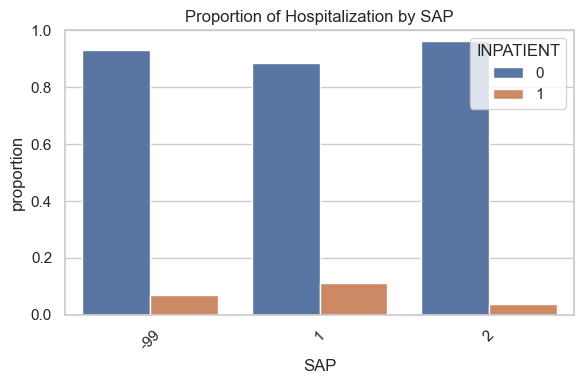

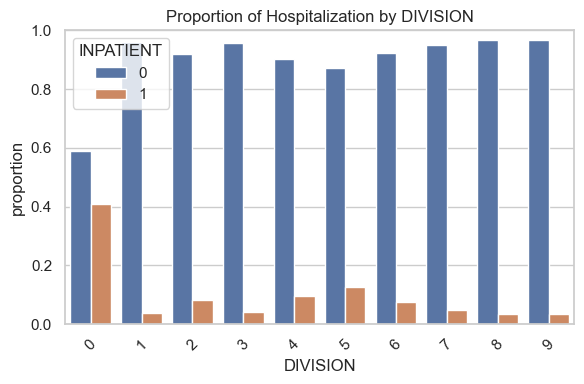

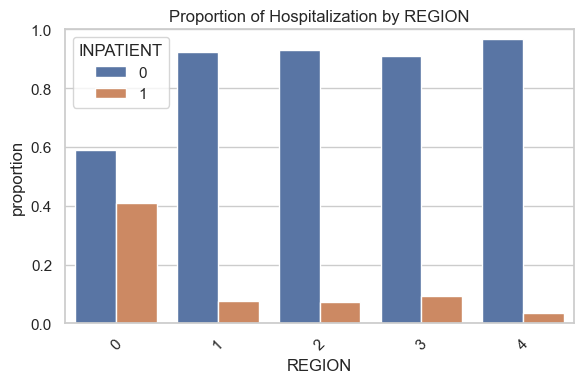

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ÏûÖÏõê Ïó¨Î∂Ä Î≥ÄÏàòÎ™Ö
target_col = 'INPATIENT'

# ÏàòÏπòÌòï / Î≤îÏ£ºÌòï Î≥ÄÏàò
numeric_cols = ['AGE', 'NUMMHS']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò
categorical_cols = ['ETHNIC', 'RACE', 'GENDER', 'SAP', 'DIVISION', 'REGION']  # Î≤îÏ£ºÌòï Î≥ÄÏàò

sns.set(style="whitegrid")
n_cols = 2  # Ìïú Ï§ÑÏóê 2Í∞úÏî© (boxplot Ïö©)

### 1. Ïó∞ÏÜçÌòï Î≥ÄÏàò ‚Üí Boxplot (Í∏∞Ï°¥ Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ)
for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target_col, y=col, data=dataset3)
    plt.title(f"{col} by Hospitalization")
    plt.tight_layout()
    plt.show()

### 2. Î≤îÏ£ºÌòï Î≥ÄÏàò ‚Üí ÎπÑÏú® ÎßâÎåÄÍ∑∏ÎûòÌîÑ
for col in categorical_cols:
    # ÎπÑÏú® Í≥ÑÏÇ∞
    prop_df = (
        dataset3
        .groupby(col)[target_col]
        .value_counts(normalize=True)
        .rename('proportion')
        .reset_index()
    )

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, 4))
    sns.barplot(data=prop_df, x=col, y='proportion', hue=target_col)
    plt.title(f"Proportion of Hospitalization by {col}")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


## üè• Step 2. ÏûÖÏõê ÏπòÎ£å Í≤ΩÌóò Î∂ÑÏÑù

### üìå 1. INPATIENT Î≥ÄÏàò Í∞úÏöî

- `SPHSERVICE`, `OPISERVICE`, `RTCSERVICE` Ï§ë ÌïòÎÇò Ïù¥ÏÉÅ Ïù¥Ïö©Ìïú ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Î•º ÏûÖÏõê ÏπòÎ£å Í≤ΩÌóòÏûêÎ°ú Ï†ïÏùòÌïòÏó¨ `INPATIENT` Î≥ÄÏàò ÏÉùÏÑ±.
- Ï†ÑÏ≤¥ ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ Ï§ë **ÏïΩ 6.88%**Í∞Ä ÏûÖÏõê Í≤ΩÌóòÏù¥ ÏûàÏóàÏúºÎ©∞, ÎÇòÎ®∏ÏßÄ **93.12%Îäî Ïô∏Îûò ÏπòÎ£åÎßå Î∞õÏùå**.

| Íµ¨Î∂Ñ | Ïù∏ÏõêÏàò | ÎπÑÏú® |
|------|--------|------|
| ÏûÖÏõê Í≤ΩÌóò ÏóÜÏùå (`INPATIENT=0`) | 4,951,772Î™Ö | 93.12% |
| ÏûÖÏõê Í≤ΩÌóò ÏûàÏùå (`INPATIENT=1`) |   365,838Î™Ö |  6.88% |

---

### üìä 2. Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê Îî∞Î•∏ ÏûÖÏõê Ïó¨Î∂Ä Ï∞®Ïù¥

- **AGE (Ïó∞Î†π)**:
  - ÏûÖÏõê Í≤ΩÌóòÏù¥ ÏûàÎäî Í∑∏Î£πÏùò Ïó∞Î†π Ï§ëÏïôÍ∞íÏù¥ Îçî ÎÜíÍ≤å ÎÇòÌÉÄÎÇ®.
  - ‚Üí **ÏûÖÏõê ÏπòÎ£åÎäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ïó∞Î†πÏù¥ ÎÜíÏùÄ ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ÏóêÍ≤å Îçî ÎπàÎ≤àÌûà Ï†ÅÏö©Îê®**.

- **NUMMHS (Ï†ïÏã†ÏßàÌôò ÏßÑÎã® Ïàò)**:
  - ÏûÖÏõê/ÎπÑÏûÖÏõê ÏßëÎã® Î™®Îëê ÌèâÍ∑† 2Í∞ú ÎØ∏ÎßåÏùò ÏßÑÎã®ÏùÑ Î∞õÏïòÍ≥†, Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏùå. 

---

### üìâ 3. Î≤îÏ£ºÌòï Î≥ÄÏàòÎ≥Ñ ÏûÖÏõê ÎπÑÏú® ÎπÑÍµê

#### üîπ ETHNIC (ÌûàÏä§Ìå®Îãâ Ïó¨Î∂Ä)
- Ìë∏ÏóêÎ•¥ÌÜ†Î¶¨ÏΩî Ï∂úÏã†(2Î≤à)Ïùò ÏûÖÏõê ÎπÑÏú®Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏïòÏúºÎ©∞, Îã§Î•∏ Í∑∏Î£π ÎåÄÎπÑ ÏïΩ **10~15% ÏàòÏ§ÄÏùò Ï∞®Ïù¥**Í∞Ä Ï°¥Ïû¨.

#### üîπ RACE (Ïù∏Ï¢Ö)
- Ï†Ñ Ïù∏Ï¢Ö Í∑∏Î£πÏóêÏÑú ÏûÖÏõê Í≤ΩÌóò ÎπÑÏú®ÏùÄ 10% ÎØ∏ÎßåÏúºÎ°ú ÌÅ∞ Ï∞®Ïù¥Îäî ÏóÜÏóàÏúºÎÇò,
- ÏùºÎ∂Ä ÏÜåÏàò Ïù∏Ï¢Ö Í∑∏Î£πÏóêÏÑú ÏÜåÌè≠ ÎÜíÏùÄ ÏûÖÏõê ÎπÑÏú® Í¥ÄÏ∏°.

#### üîπ GENDER (ÏÑ±Î≥Ñ)
- **Ïó¨ÏÑ±(1Î≤à)Ïùò ÏûÖÏõê ÎπÑÏú®Ïù¥ ÎÇ®ÏÑ±Î≥¥Îã§ Îã§ÏÜå ÎÜíÏùå**.
- ÏÑ±Î≥ÑÏóê Îî∞Îùº ÏπòÎ£å Î∞©Ïãù Ï†ëÍ∑ºÏÑ±Ïù¥ Îã§Î•º Ïàò ÏûàÎäî Í∞ÄÎä•ÏÑ± Ï°¥Ïû¨.

#### üîπ SAP (Î¨ºÏßà ÏÇ¨Ïö© Î¨∏Ï†ú Ïó¨Î∂Ä)
- **SAP=1 (Î¨∏Ï†ú ÏûàÏùå)** ÏßëÎã®Ïùò ÏûÖÏõê ÎπÑÏú®Ïù¥ Í∞ÄÏû• ÎÜíÏùå.
- ‚Üí **Î¨ºÏßà ÏÇ¨Ïö© Î¨∏Ï†úÎäî ÏûÖÏõêÏπòÎ£å Í∞ÄÎä•ÏÑ±ÏùÑ ÎÜíÏù¥Îäî ÌïµÏã¨ ÏöîÏù∏** Ï§ë ÌïòÎÇòÎ°ú Î≥¥ÏûÑ.

#### üîπ DIVISION / REGION (Ïù∏Íµ¨Ï°∞ÏÇ¨ Íµ¨Ïó≠)
- ÌäπÏ†ï ÏßÄÏó≠(Ïòà: `DIVISION=0`, `REGION=0`)Ïùò ÏûÖÏõê ÎπÑÏú®Ïù¥ Îß§Ïö∞ ÎÜíÏùå.
- ‚Üí **ÏßÄÏó≠ Í∞Ñ ÏùòÎ£å Ï†ëÍ∑ºÏÑ±, Ï†ïÏ±Ö Ï∞®Ïù¥, Î≥¥Í≥† Í¥ÄÌñâ**Ïù¥ ÏûÖÏõê ÌôïÎ•†Ïóê ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏùå.

---

### üß† ÏöîÏïΩ Î∞è ÏãúÏÇ¨Ï†ê

- ÏûÖÏõê ÏπòÎ£åÎäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú **ÎÇòÏù¥Í∞Ä ÎßéÍ≥†**, **Î¨ºÏßà ÏÇ¨Ïö© Î¨∏Ï†úÍ∞Ä ÏûàÎäî ÏÇ¨Îûå**ÏóêÍ≤å Îçî ÏûêÏ£º Î∞úÏÉù.
- ÎòêÌïú **ÏÑ±Î≥Ñ(GENDER)**, **Ï∂úÏã†(Ethnic/Race)**, **ÏßÄÏó≠(REGION/DIVISION)** ÏöîÏù∏ÎèÑ ÏûÖÏõê Ïó¨Î∂ÄÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ.
- ‚Üí Ïù¥ÌõÑ Î∂ÑÏÑùÏóêÏÑú `INPATIENT`Î•º **ÏòàÏ∏° ÎåÄÏÉÅ Î≥ÄÏàòÎ°ú ÏßÄÏ†ï**ÌïòÍ≥†, Ï£ºÏöî ÏöîÏù∏ÏùÑ Í∑úÎ™ÖÌïòÍ∏∞ ÏúÑÌïú **Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÎòêÎäî Ìä∏Î¶¨ Î™®Îç∏** Î∂ÑÏÑùÏù¥ Í∞ÄÎä•.

